In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('cripto5.csv', encoding='utf-8')

In [17]:
df.head()

,Date,BTC-USD,ETH-USD,ADA-USD,BNB-USD
0,2022-01-01,47686.812500,3769.697021,1.376975,527.352722
1,2022-01-02,47345.218750,3829.564941,1.377584,531.396667
2,2022-01-03,46458.117188,3761.380371,1.321637,512.135986
3,2022-01-04,45897.574219,3794.056641,1.311658,507.506104
4,2022-01-05,43569.003906,3550.386963,1.236002,475.056946


In [23]:
df = df.drop(columns=['Date'])

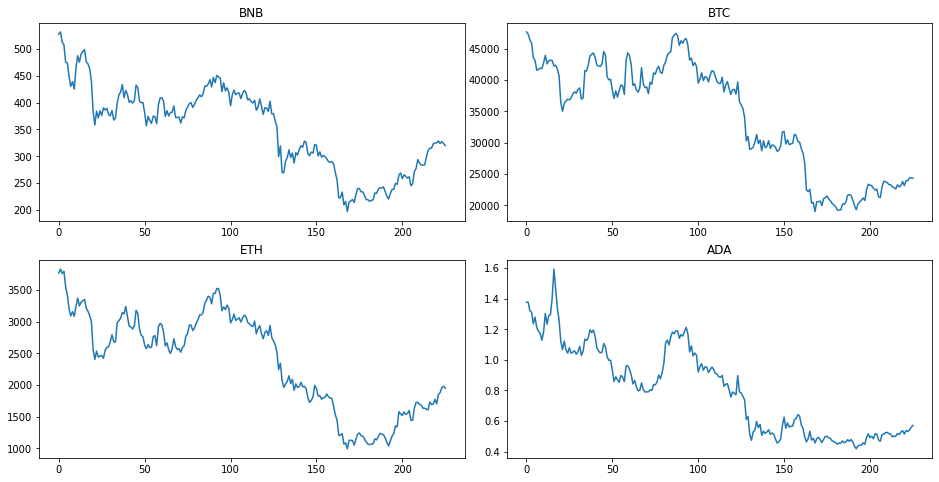

In [21]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(df['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(df['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(df['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(df['ADA-USD'])
axs[1,1].set_title('ADA')
plt.show()

In [24]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = df.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,BTC-USD,ETH-USD,ADA-USD,BNB-USD
1,-0.007163,0.015881,0.000442,0.007668
2,-0.018737,-0.017805,-0.040612,-0.036245
3,-0.012066,0.008687,-0.007550,-0.009040
4,-0.050734,-0.064224,-0.057680,-0.063938
5,-0.009366,-0.037173,0.035421,-0.003750


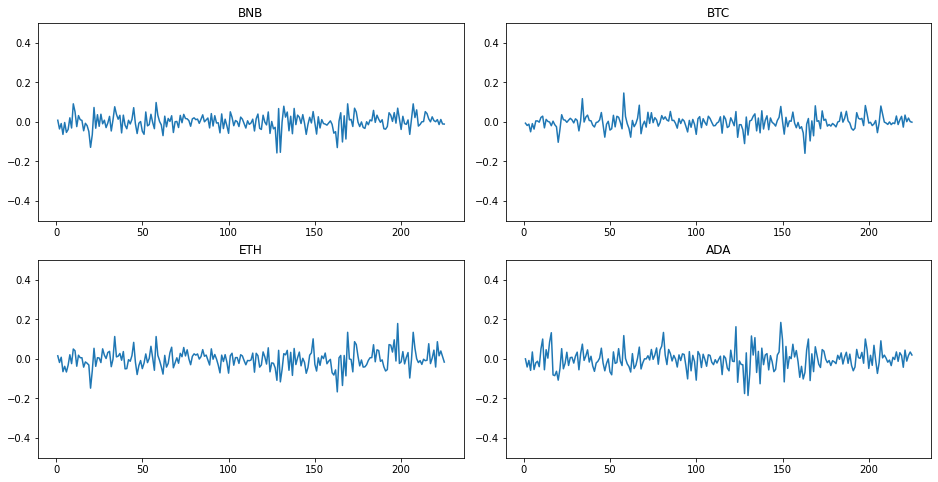

In [25]:
#ploting the returns
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['ADA-USD'])
axs[1,1].set_title('ADA')
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

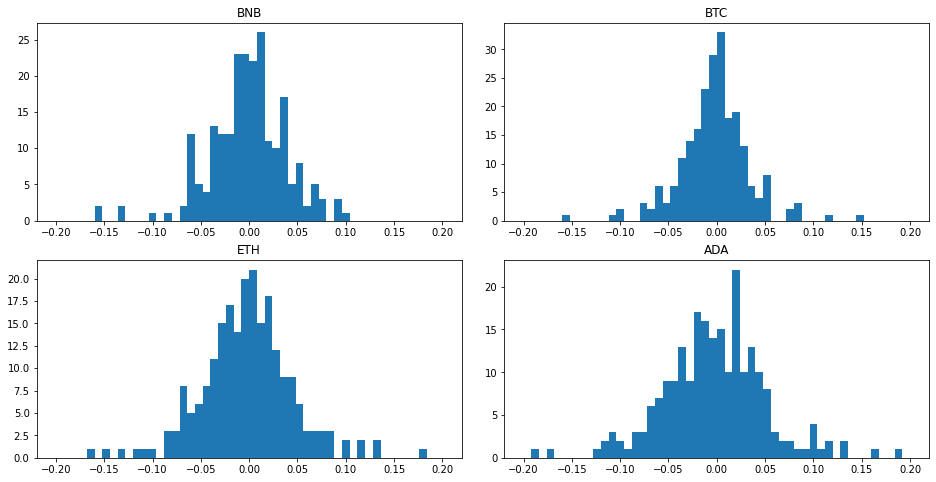

In [26]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['BNB-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BNB')
axs[0,1].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BTC')
axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['ADA-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('ADA')
plt.show()

In [27]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,BTC-USD,ETH-USD,ADA-USD,BNB-USD
1,-0.716327,1.588136,0.044222,0.766839
2,-2.576594,-0.220619,-4.018811,-2.885495
3,-3.752061,0.646196,-4.743516,-3.763443
4,-8.635110,-5.817710,-10.237883,-9.916660
5,-9.490848,-9.318755,-7.058443,-10.254449


<AxesSubplot:>

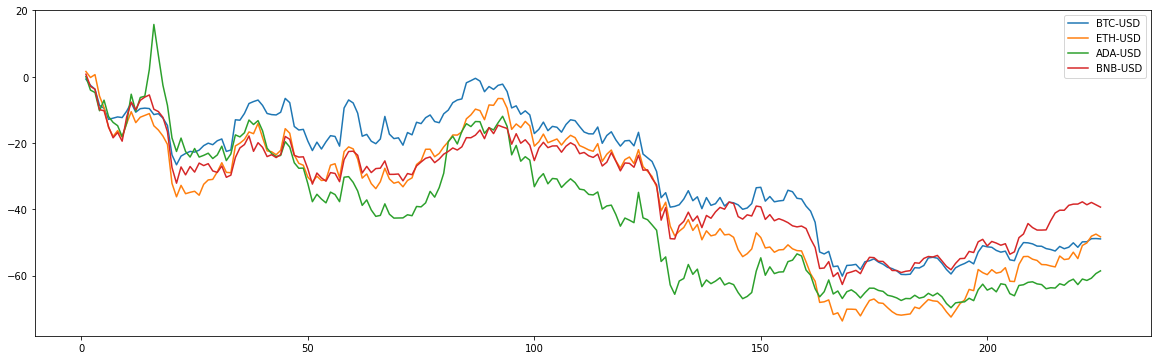

In [28]:
cum_returns.plot(figsize=(20,6))

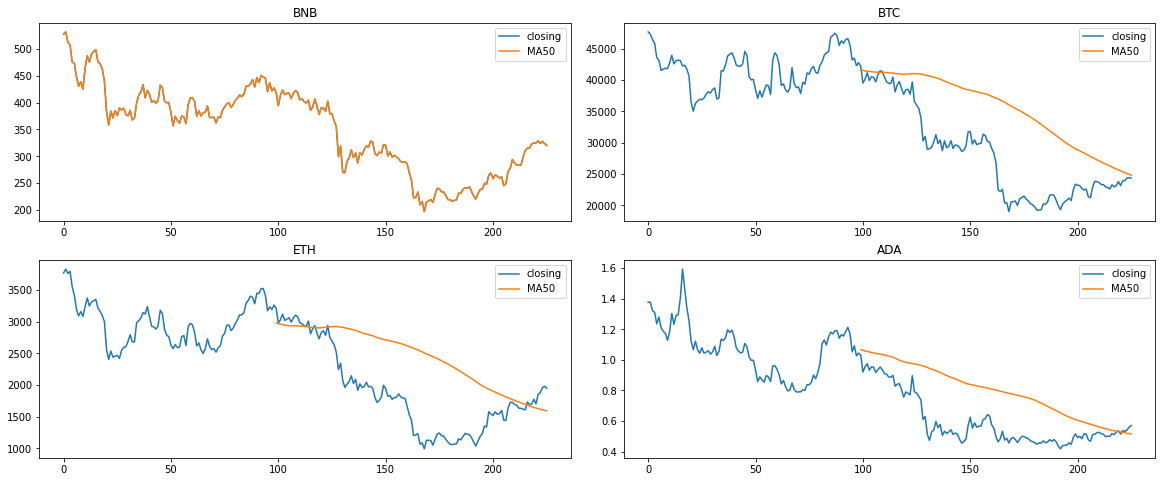

In [29]:
# compute a short-term 20-day moving average
MA20 = df.rolling(20).mean()
# compute a Long-term 50-day moving average
MA50 = df.rolling(100).mean()
# compute a Long-term 100-day moving average
MA100 = df.rolling(100).mean()
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(df['BNB-USD'], label= 'closing')
axs[0,0].plot(df['BNB-USD'], label= 'MA50')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(df['BTC-USD'], label= 'closing')
axs[0,1].plot(MA50['BTC-USD'], label= 'MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(df['ETH-USD'], label= 'closing')
axs[1,0].plot(MA50['ETH-USD'], label= 'MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(df['ADA-USD'], label= 'closing')
axs[1,1].plot(MA50['ADA-USD'], label= 'MA50')
axs[1,1].set_title('ADA')
axs[1,1].legend()
plt.show()

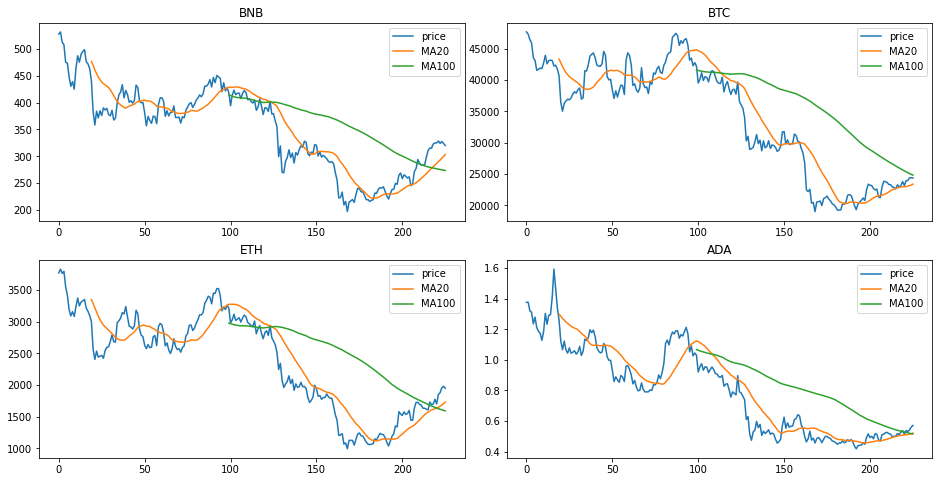

In [30]:
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(df['BNB-USD'], label= 'price')
axs[0,0].plot(MA20['BNB-USD'], label= 'MA20')
axs[0,0].plot(MA100['BNB-USD'], label= 'MA100')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(df['BTC-USD'], label= 'price')
axs[0,1].plot(MA20['BTC-USD'], label= 'MA20')
axs[0,1].plot(MA100['BTC-USD'], label= 'MA100')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(df['ETH-USD'], label= 'price')
axs[1,0].plot(MA20['ETH-USD'], label= 'MA20')
axs[1,0].plot(MA100['ETH-USD'], label= 'MA100')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(df['ADA-USD'], label= 'price')
axs[1,1].plot(MA20['ADA-USD'], label= 'MA20')
axs[1,1].plot(MA100['ADA-USD'], label= 'MA100')
axs[1,1].set_title('ADA')
axs[1,1].legend()
plt.show()

In [31]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)

In [32]:
df_scale = pd.DataFrame(scaled, columns = df.columns)

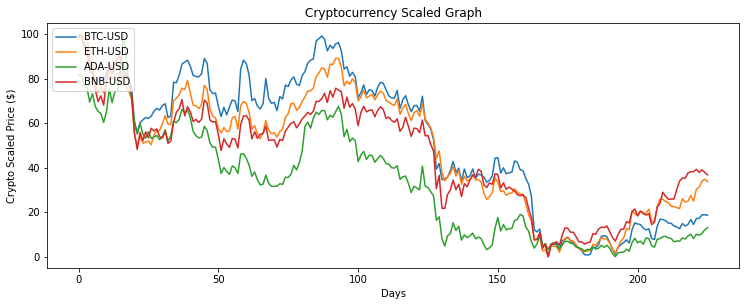

In [33]:
#Visualize the scaled data
my_crypto = df_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label=c)
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [34]:
DSR = df.pct_change(1)

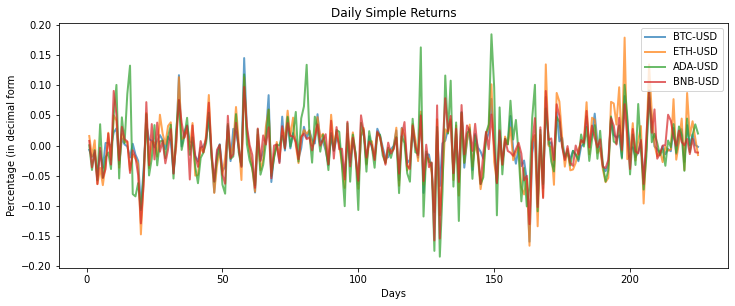

In [35]:
# Visualize and graph the daily simple returns.

plt.figure(figsize=(12, 4.5))

for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

<AxesSubplot:>

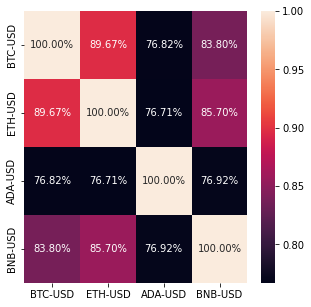

In [36]:
plt.subplots(figsize= (5,5))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [37]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC-USD    0.035680
ETH-USD    0.047383
ADA-USD    0.053180
BNB-USD    0.040145
dtype: float64

In [38]:
DSR.mean()

BTC-USD   -0.002340
ETH-USD   -0.001804
ADA-USD   -0.002489
BNB-USD   -0.001398
dtype: float64

In [40]:
#Time to get and show the daily cumulative simple returns.
DCSR = (DSR+1).cumprod()
DCSR.head(5)

,BTC-USD,ETH-USD,ADA-USD,BNB-USD
0,NaN,NaN,NaN,NaN
1,0.992837,1.015881,1.000442,1.007668
2,0.974234,0.997794,0.959812,0.971145
3,0.962479,1.006462,0.952565,0.962366
4,0.913649,0.941823,0.897621,0.900833


In [41]:
# Calculating the long-window simple moving average
long_rolling = my_crypto.rolling(window=100).mean()
long_rolling.tail()

,BTC-USD,ETH-USD,ADA-USD,BNB-USD
221,22.165683,22.331885,9.155525,23.624499
222,21.684576,22.013734,8.951575,23.446019
223,21.151057,21.666970,8.648745,23.221742
224,20.727220,21.396202,8.452062,23.057534
225,20.320169,21.133528,8.271511,22.880402
